<a href="https://colab.research.google.com/github/ibader85/UnstructuredDataAnalytics/blob/main/14_Advanced_Topics_JSON_Data_and_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

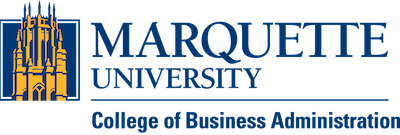

#BUAN4060: Unstructured Data Analytics

##14 JSON Data and R

##Instructor: Dr. Badar Al Lawati "Dr. B"


**R on Colab:**

* You can change the runtime from Python to R, by clicking on the down arrow next to Connect, and picking "Change Runtime Type"

* You can change the project name by clicking on the title on top of this page

* You can export your notebook by going to File > Download .ipynb

## 1 What is JSON Data?
JSON (JavaScript Object Notation) is a lightweight data-interchange format. It is easy for humans to read and write. It is easy for machines to parse and generate. It is based on a subset of the JavaScript Programming Language Standard ECMA-262 3rd Edition - December 1999

JSON is a text format that is completely language independent but uses conventions that are familiar to programmers of the C-family of languages, including C, C++, C#, Java, JavaScript, Perl, Python, and many others. These properties make JSON an ideal data-interchange language.

JSON is built on two structures:

1. A collection of name/value pairs. In various languages, this is realized as an object, record, struct, dictionary, hash table, keyed list, or associative array
2. An ordered list of values. In most languages, this is realized as an array, vector, list, or sequence


These are universal data structures. Virtually all modern programming languages support them in one form or another. It makes sense that a data format that is interchangeable with programming languages also be based on these structures.

In JSON, they take on these forms:

1. An object is an unordered set of name/value pairs. An object begins with left brace and ends with right brace. Each name is followed by colon and the name/value pairs are separated by a comma

2. An array is an ordered collection of values. An array begins with left bracket and ends with right bracket. Values are separated by a comma

3. A value can be a string in double quotes, or a number, or true or false or null, or an object or an array. These structures can be nested

4. A string is a sequence of zero or more Unicode characters, wrapped in double quotes, using backslash escapes. A character is represented as a single character string. A string is very much like a C or Java string

5. A number is very much like a C or Java number, except that the octal and hexadecimal formats are not used

6. Whitespace can be inserted between any pair of tokens. Excepting a few encoding details, that completely describes the language

## 2 Working With Json Data

When using R to read JSON files or datasets containing columns of JSON objects or arrays, we often get very long strings or deeply nested lists. However, ideally, we would want to work with data structures that are more easily to manipulate in R, such as vectors or data frames. How to do transformations and solve the problems then?

In this post, we discuss how to handle JSON objects and flatten list-column of data frames.

Reading JSON objects, arrays or files:

- jsonlite::fromJSON() reads JSON objects and arrays
- jsonlite::stream_in() implements line-by-line processing of JSON data * and works over a connection (e.g. url, file)

Flattening list of data frames, list of vectors, or nested data frames:

- tidyr::unnest() flattens a list-column of data frames to regular columns
- tidyr::unnest_longer() and tidyr::unnest_wider() rectangle and collapse deeply nested lists into regular columns. unnest_longer() turns each element of a list-column into a row; it preserves the columns, but changes the rows. unnest_wider() turns each element of a list-column into a column; it preserves the rows, but changes the columns
- jsonlite::flatten() flattens nested data frames

Working with lists:

- purrr::map() applies a function to each element of a vector. It can also extract elements from a deeply nested list. purrr::map() returns a list. plyr ::ldply splits a list, applies a function, and returns results in a data frame

###Handling JSON objects:
The sample dataset we will be using is ted_main.csv, which is part of the Ted Talks data that can be downloaded from Kaggle. In this dataset, ratings takes the form of JSON objects, which is a stringified dictionary of the various ratings given to the talk

In [1]:
install.packages("dplyr")
library(dplyr)
tedtalk = read.csv("/content/ted_main.csv")
glimpse(tedtalk)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Rows: 2,550
Columns: 17
$ comments           <int> 4553, 265, 124, 200, 593, 672, 919, 46, 852, 900, 7…
$ description        <chr> "Sir Ken Robinson makes an entertaining and profoun…
$ duration           <int> 1164, 977, 1286, 1116, 1190, 1305, 992, 1198, 1485,…
$ event              <chr> "TED2006", "TED2006", "TED2006", "TED2006", "TED200…
$ film_date          <int> 1140825600, 1140825600, 1140739200, 1140912000, 114…
$ languages          <int> 60, 43, 26, 35, 48, 36, 31, 19, 32, 31, 27, 20, 24,…
$ main_speaker       <chr> "Ken Robinson", "Al Gore", "David Pogue", "Majora C…
$ name               <chr> "Ken Robinson: Do schools kill creativity?", "Al Go…
$ num_speaker        <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ published_date     <int> 1151367060, 1151367060, 1151367060, 1151367060, 115…
$ ratings            <chr> "[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id'…
$ related_talks      <chr> "[{'id': 865, 'hero': 'https://pe.tedcdn.com/images…
$ speaker_occupa

In [2]:
head(tedtalk)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
,<int>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,4553,Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]","[{'id': 865, 'hero': 'https://pe.tedcdn.com/images/ted/172559_800x600.jpg', 'speaker': 'Ken Robinson', 'title': 'Bring on the learning revolution!', 'duration': 1008, 'slug': 'sir_ken_robinson_bring_on_the_revolution', 'viewed_count': 7266103}, {'id': 1738, 'hero': 'https://pe.tedcdn.com/images/ted/de98b161ad1434910ff4b56c89de71af04b8b873_1600x1200.jpg', 'speaker': 'Ken Robinson', 'title': ""How to escape education's death valley"", 'duration': 1151, 'slug': 'ken_robinson_how_to_escape_education_s_death_valley', 'viewed_count': 6657572}, {'id': 2276, 'hero': 'https://pe.tedcdn.com/images/ted/3821f3728e0b755c7b9aea2e69cc093eca41abe1_2880x1620.jpg', 'speaker': 'Linda Cliatt-Wayman', 'title': 'How to fix a broken school? Lead fearlessly, love hard', 'duration': 1027, 'slug': 'linda_cliatt_wayman_how_to_fix_a_broken_school_lead_fearlessly_love_hard', 'viewed_count': 1617101}, {'id': 892, 'hero': 'https://pe.tedcdn.com/images/ted/e79958940573cc610ccb583619a54866c41ef303_2880x1620.jpg', 'speaker': 'Charles Leadbeater', 'title': 'Education innovation in the slums', 'duration': 1138, 'slug': 'charles_leadbeater_on_education', 'viewed_count': 772296}, {'id': 1232, 'hero': 'https://pe.tedcdn.com/images/ted/0e3e4e92d5ee8ae0e43962d447d3f790b31099b8_800x600.jpg', 'speaker': 'Geoff Mulgan', 'title': 'A short intro to the Studio School', 'duration': 376, 'slug': 'geoff_mulgan_a_short_intro_to_the_studio_school', 'viewed_count': 667971}, {'id': 2616, 'hero': 'https://pe.tedcdn.com/images/ted/71cde5a6fa6c717488fb55eff9eef939a9241761_2880x1620.jpg', 'speaker': 'Kandice Sumner', 'title': ""How America's public schools keep kids in poverty"", 'duration': 830, 'slug': 'kandice_sumner_how_america_s_public_schools_keep_kids_in_poverty', 'viewed_count': 1181333}]",Author/educator,"['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching']",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_schools_kill_creativity,47227110
2,265,"With the same humor and humanity he exuded in ""An Inconvenient Truth,"" Al Gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter brand name for global warming.",977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'id': 3, 'name': 'Courageous', 'count': 139}, {'id': 2, 'name': 'Confusing', 'count': 62}, {'id': 1, 'name': 'Beautiful', 'count': 58}, {'id': 21, 'name': 'Unconvincing', 'count': 258}, {'id': 11, 'name': 'Longwinded', 'count': 113}, {'id': 8, 'name': 'Informative', 'count': 443}, {'id': 10, 'name': 'Inspiring', 'count': 413}, {'id': 22, 'name': 'Fascinating', 'count': 132}, {'id': 9, 'name': 'Ingenious', 'count': 56}, {'id': 24, 'name': 'Persuasive', '

### 2.1 Reading JSON Objects
Using jsonlite::fromJSON to read ratings, we get a list of data frames

In [3]:
install.packages("jsonlite")
install.packages("purrr")
library(jsonlite)
library(purrr)

### fromJSON takes JSON strings
tedtalk$ratings2 <- gsub("'", '"', tedtalk$ratings)
tedtalk$ratings2 <- map(tedtalk$ratings2, fromJSON)
head(tedtalk$ratings2, 2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘purrr’


The following object is masked from ‘package:jsonlite’:

    flatten




,id,name,count
,<int>,<chr>,<int>
1,7,Funny,19645
2,1,Beautiful,4573
3,9,Ingenious,6073
4,3,Courageous,3253
5,11,Longwinded,387
6,2,Confusing,242
7,8,Informative,7346
8,22,Fascinating,10581
9,21,Unconvincing,300


### 2.2 Flattening list-column of Data Frames
The question then becomes how to flatten the list-column of data frames to regular columns

One solution is to use tidyr::unnest(). For each title, we take out the frame of ratings from the list ratings2; these data frames consist of three columns id, name and count. The flattened data frame is in the long format.

Below we show the output of the first two talks

In [4]:
install.packages("tidyr")
install.packages("dplyr")

library(tidyr)
library(dplyr)

rating <- tedtalk %>% select(title, ratings2) %>% unnest(ratings2)
head(rating, 20)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



title,id,name,count
<chr>,<int>,<chr>,<int>
Do schools kill creativity?,7,Funny,19645
Do schools kill creativity?,1,Beautiful,4573
Do schools kill creativity?,9,Ingenious,6073
Do schools kill creativity?,3,Courageous,3253
Do schools kill creativity?,11,Longwinded,387
Do schools kill creativity?,2,Confusing,242
Do schools kill creativity?,8,Informative,7346
Do schools kill creativity?,22,Fascinating,10581
Do schools kill creativity?,21,Unconvincing,300
